<a href="https://colab.research.google.com/github/2k3sonnguyen/machine-learning/blob/main/Predict_customers_who_stop_using_the_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phân tích tỷ lệ giữ chân khách hàng**

Khách hàng rời bỏ là thuật ngữ dùng để mô tả thời điểm khách hàng kết thúc mối quan hệ hoặc đăng ký với một công ty hoặc nhà cung cấp dịch vụ. Sự rời bỏ ảnh hưởng đến doanh thu, sự tăng trưởng và lòng trung thành của khách hàng của doanh nghiệp. Bằng cách nghiên cứu tỷ lệ rời bỏ và các tính năng liên quan của nó, các công ty có thể tìm ra cách để giữ chân khách hàng hiện tại, khiến họ hạnh phúc hơn và giảm tỷ lệ rời bỏ. Họ cũng có thể sử dụng các mô hình dự đoán để dự đoán và ngăn chặn tình trạng rời bỏ trong tương lai, đồng thời thực hiện hành động để giữ chân những khách hàng có khả năng rời đi.

# **1 | Statistics and processing**

# **1.1 | Dataset Description**

CustomerID: Mã định danh duy nhất cho mỗi khách hàng

Age: Tuổi của khách hàng

Gender: Giới tính của khách hàng

Tenure: Khoảng thời gian tính bằng tháng mà khách hàng đã sử dụng sản phẩm hoặc dịch vụ của công ty

Usage Frequency: Số lần khách hàng đã sử dụng dịch vụ của công ty trong tháng trước

Support Calls: Số cuộc gọi mà khách hàng đã thực hiện tới bộ phận hỗ trợ khách hàng trong tháng trước

Payment Delay: Số ngày khách hàng trì hoãn thanh toán trong tháng trước

Subscription Type: Loại đăng ký của khách hàng đã chọn

Contract Length: Thời hạn hợp đồng mà khách hàng đã ký với công ty

Total Spend: Tổng số tiền khách hàng đã chi cho sản phẩm, dịch vụ của công ty

Last Interaction: Số ngày kể từ lần tương tác cuối cùng mà khách hàng có với công ty công ty

Churn: Nhãn nhị phân cho biết khách hàng có rời bỏ (1) hay không (0)

# **1.2 | Import Library**

# **1.2.1 | Import Library**

In [91]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# **1.2.2 | Import Files**

In [92]:
df=pd.read_csv("/content/sample_data/customer_churn_dataset-training-master.csv")

# **2 | Dataframe Investigation**

# **2.1 | Basic Steps**

In [93]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [95]:
df.shape

(440833, 12)

In [96]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [97]:
df.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

# **2.2 | Null Value Check**

# **2.3 | Unique Value Check**

In [98]:
# Kiểm tra giá trị null trong từng cột
null_values_by_column = df.isnull().sum()

# Hiển thị kết quả
print("Null values by column:")
print(null_values_by_column)

Null values by column:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [99]:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

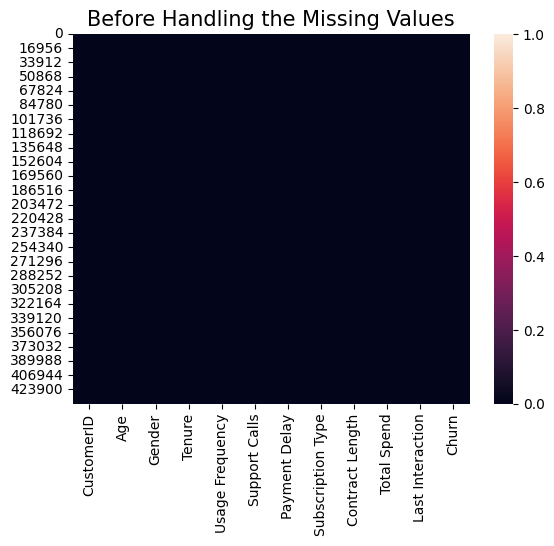

In [100]:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

Vi dữ liệu không có giá trị thiếu nên không cần xử lý gì


In [101]:
# Loại bỏ các dòng chứa giá trị NaN
df = df.dropna()

# Hiển thị DataFrame sau khi loại bỏ giá trị NaN
print(df)

        CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
0              

In [102]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

# **3 | Analysis and Visualization**

In [103]:
# xem số lượng có thuộc tính churn
churn_counts = df['Churn'].value_counts()
print("Số lượng của biến Churn:")
print(churn_counts)

Số lượng của biến Churn:
1.0    249999
0.0    190833
Name: Churn, dtype: int64


In [104]:
# Tính toán tỷ lệ churn
total_customers = df.CustomerID.nunique()
churned_customers = df[df.Churn == 1]['CustomerID'].nunique()
churn_rate = churned_customers / total_customers

# Hiển thị kết quả
print("The churn rate of our customers is: {:.2f}%".format(churn_rate * 100))

The churn rate of our customers is: 56.71%


<Axes: title={'center': 'Count of Class'}, xlabel='Churn', ylabel='count'>

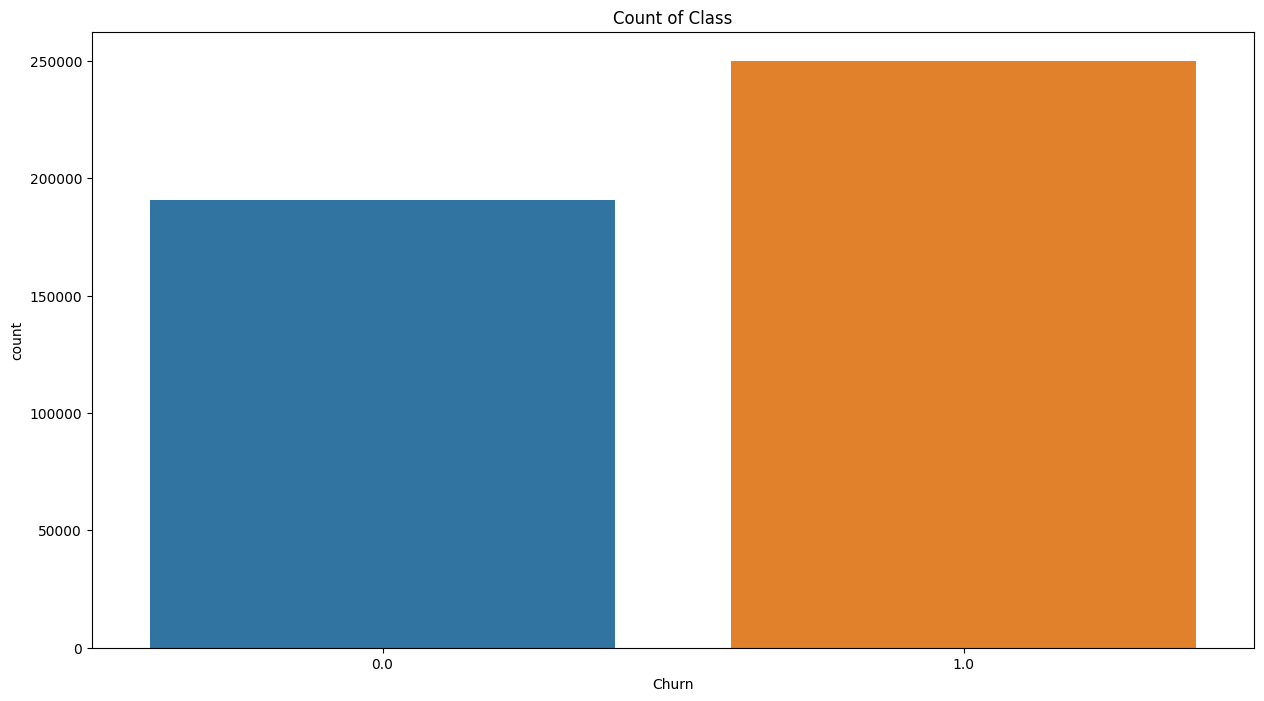

In [105]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Churn')

# **3.1 Descrete Data**

In [106]:
def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())

    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of cutomer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of cutomer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")

def make_boxplot(df, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(df, x=feature)
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

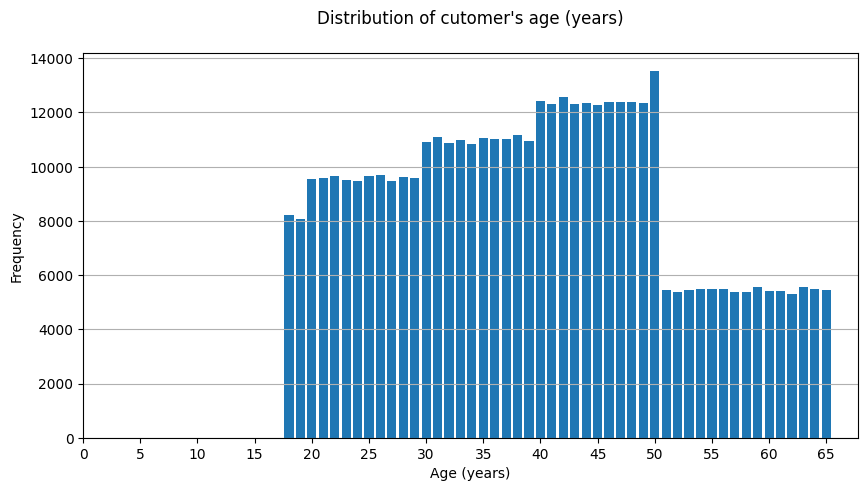

Distribution of cutomer's age (years): 39.37 ± 39.00 years
Median: 39.00 years
Minimum: 18.0 years
Maximum: 65.0 years

0.162 Skewness



In [107]:
make_barplot(df, 'Age', custom_ticks=np.arange(0, 66, 5), additional=' (years)', unit='years')

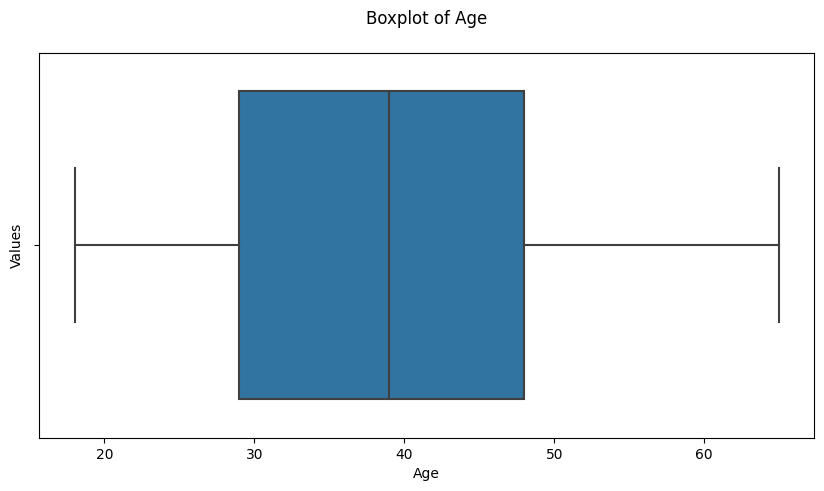

In [108]:
make_boxplot(df, 'Age')

Hầu hết khách hàng ở độ tuổi 40-50, trong đó độ tuổi 50 là phổ biến nhất. Có số lượng khách hàng từ 51 tuổi trở lên rất thấp.

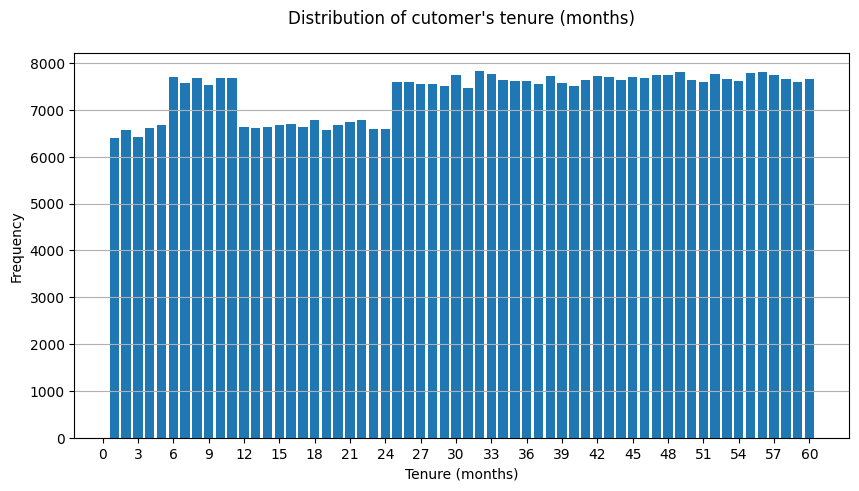

Distribution of cutomer's tenure (months): 31.26 ± 32.00 months
Median: 32.00 months
Minimum: 1.0 months
Maximum: 60.0 months

-0.061 Skewness



In [109]:
make_barplot(df, 'Tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months')

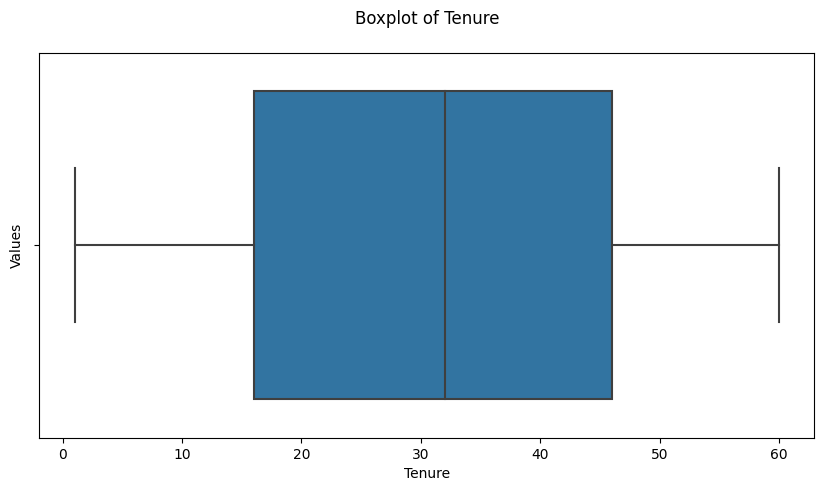

In [110]:
make_boxplot(df, 'Tenure')

Khách hàng có xu hướng gắn bó lâu hơn với việc khách hàng rời đi phổ biến hơn trong khoảng thời gian thuê 1-5 tháng và 12-24 tháng.

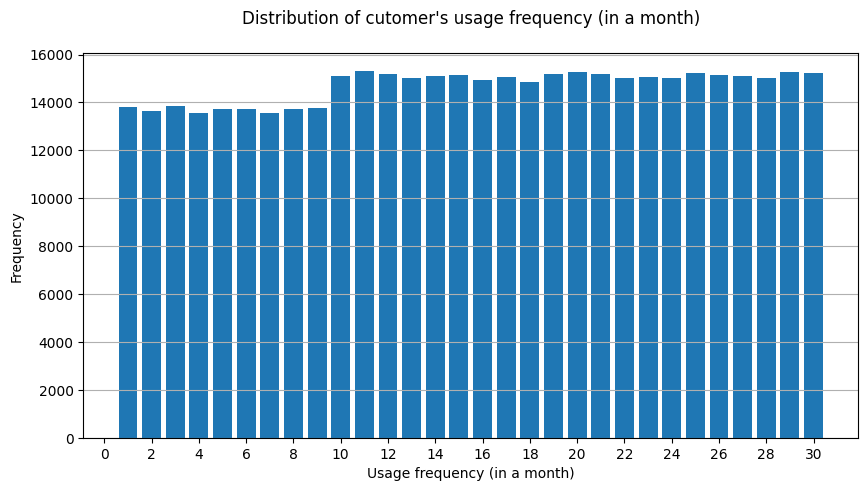

Distribution of cutomer's usage frequency (in a month): 15.81 ± 16.00 times
Median: 16.00 times
Minimum: 1.0 times
Maximum: 30.0 times

-0.043 Skewness



In [111]:
make_barplot(df, 'Usage Frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)')

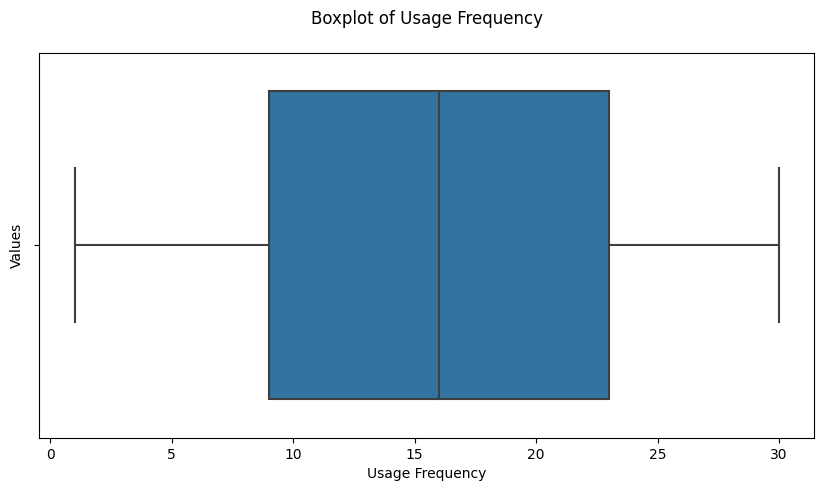

In [112]:
make_boxplot(df, 'Usage Frequency')


Trung bình, khách hàng có xu hướng sử dụng dịch vụ của công ty 16 lần trong một tháng, với sự thay đổi lớn về tần suất sử dụng của từng cá nhân cho thấy thói quen sử dụng dịch vụ đa dạng.

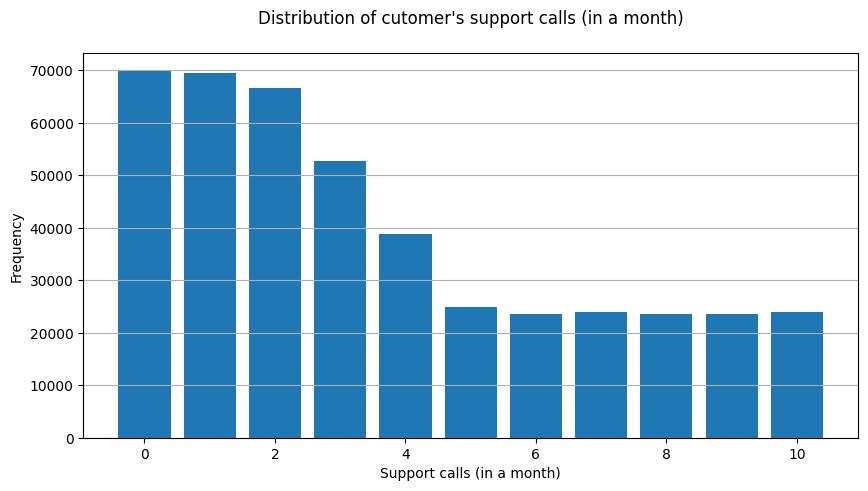

Distribution of cutomer's support calls (in a month): 3.60 ± 3.00 calls
Median: 3.00 calls
Minimum: 0.0 calls
Maximum: 10.0 calls

0.667 Skewness



In [113]:
make_barplot(df, 'Support Calls', unit='calls', additional=' (in a month)')

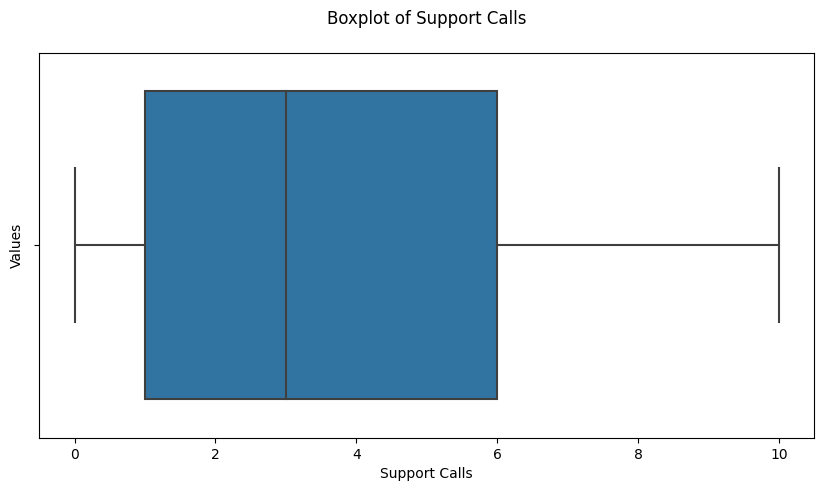

In [114]:
make_boxplot(df, 'Support Calls')


Trung bình, khách hàng có xu hướng thực hiện 3 cuộc gọi hỗ trợ trong một tháng. Khách hàng có xu hướng thực hiện 1 hoặc 2 cuộc gọi hỗ trợ mỗi tháng, hầu hết không thực hiện cuộc gọi hỗ trợ nào.

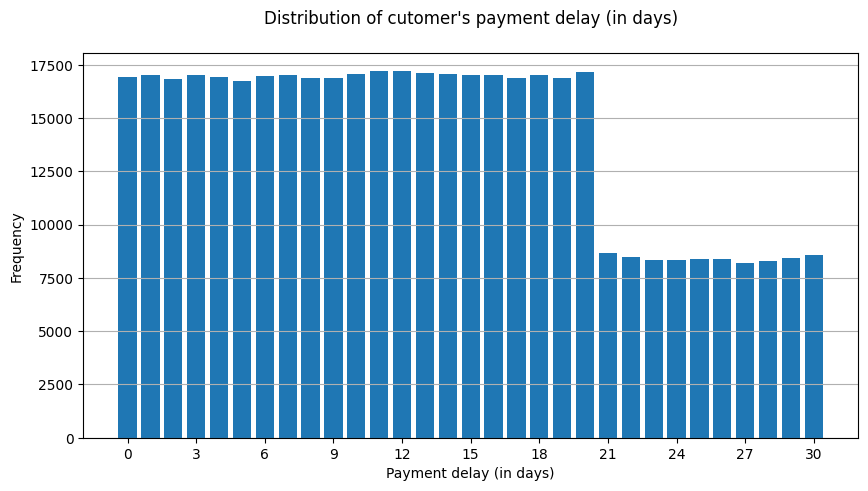

Distribution of cutomer's payment delay (in days): 12.97 ± 12.00 days
Median: 12.00 days
Minimum: 0.0 days
Maximum: 30.0 days

0.267 Skewness



In [115]:
make_barplot(df, 'Payment Delay', custom_ticks=np.arange(0, 32, 3), unit='days', additional=' (in days)')

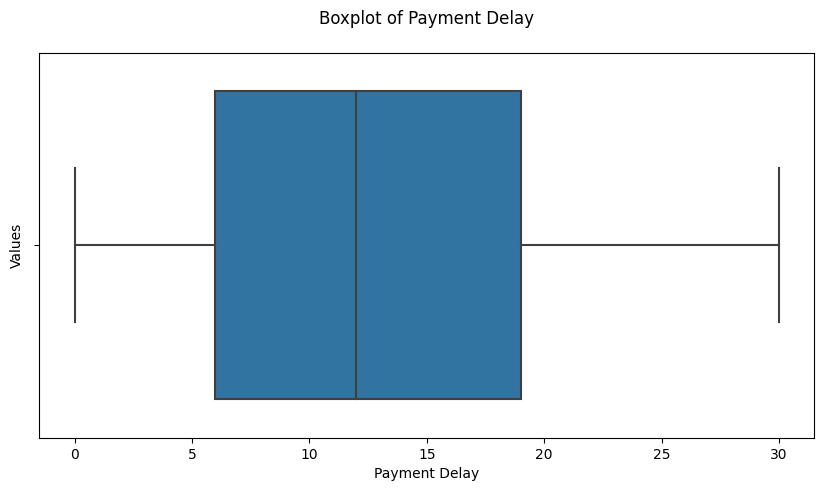

In [116]:
make_boxplot(df, 'Payment Delay')

Trung bình, khách hàng có xu hướng trì hoãn thanh toán trong 13 ngày, với sự thay đổi lớn về thời gian trì hoãn thanh toán của từng cá nhân cho thấy thói quen thanh toán đa dạng không được ưa chuộng. Hầu hết khách hàng thanh toán trong vòng 20 ngày.

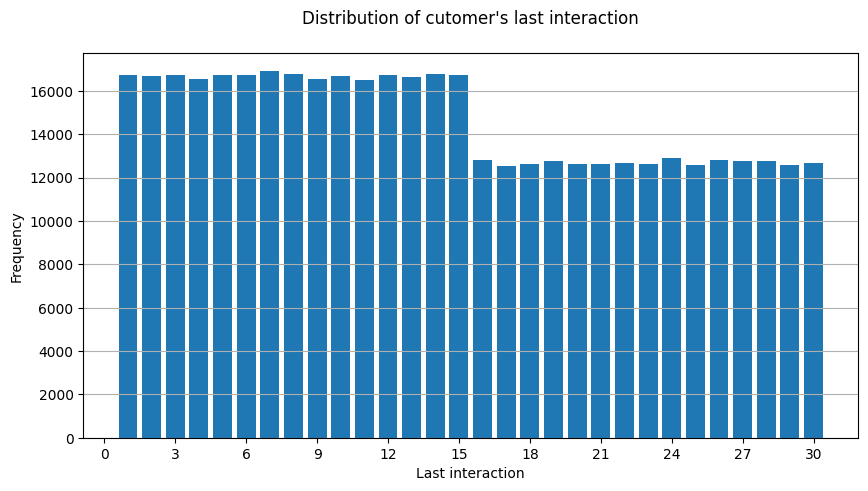

Distribution of cutomer's last interaction: 14.48 ± 14.00 days
Median: 14.00 days
Minimum: 1.0 days
Maximum: 30.0 days

0.177 Skewness



In [117]:
make_barplot(df, 'Last Interaction', custom_ticks=np.arange(0, 32, 3), unit='days', additional='')

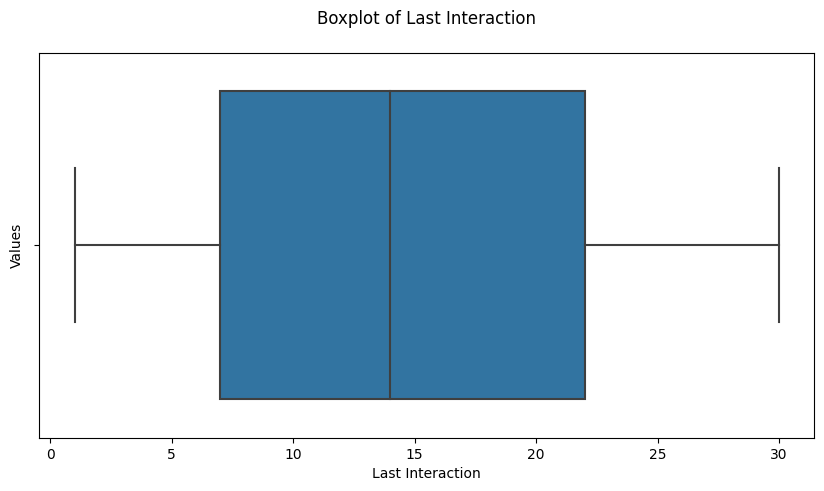

In [118]:
make_boxplot(df, 'Last Interaction')


Hầu hết khách hàng có xu hướng có 15 lần tương tác cuối cùng hoặc ít hơn, trung bình là khoảng 14 ngày.

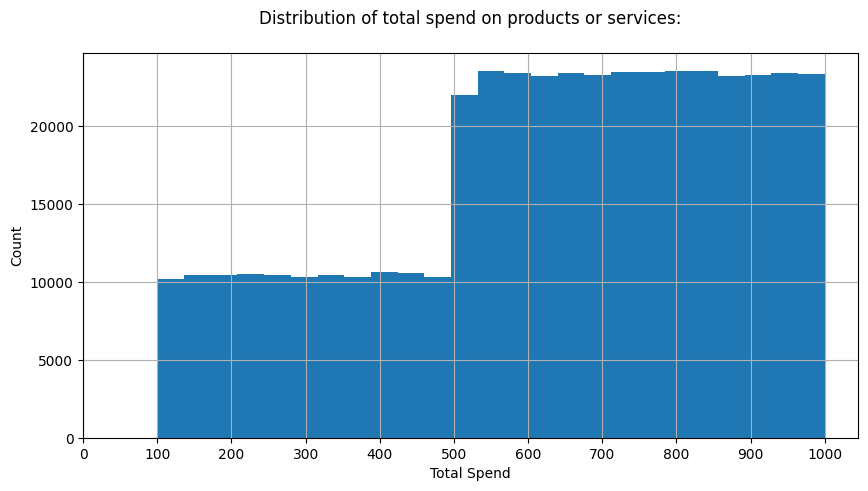

Distribution of total spend on products or services: 631.62 ± 661.00 USD
Median: 661.00 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.457 Skewness



In [119]:
make_histogram(df, 'Total Spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

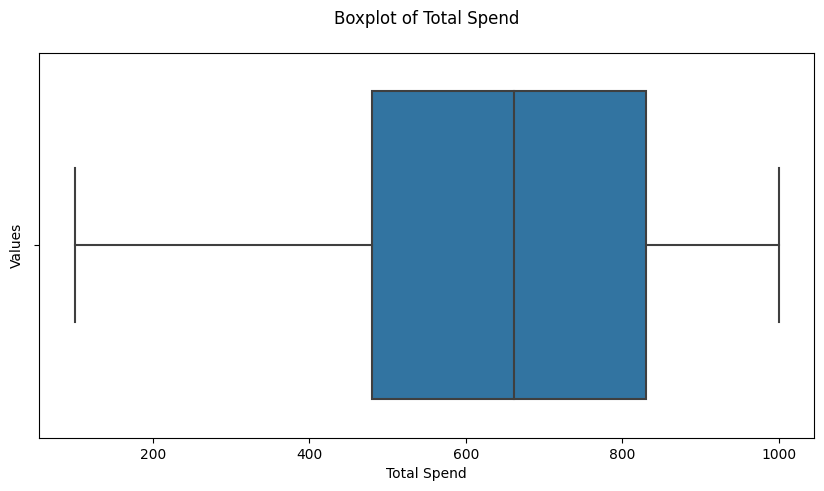

In [120]:
make_boxplot(df, 'Total Spend')

Trung bình, khách hàng có xu hướng gửi khoảng 631,62 USD, với mức chi tiêu của khách hàng có sự biến động lớn. Hầu hết khách hàng có xu hướng chi hơn 500 USD.

# **3.2 Multivariate Analysis**

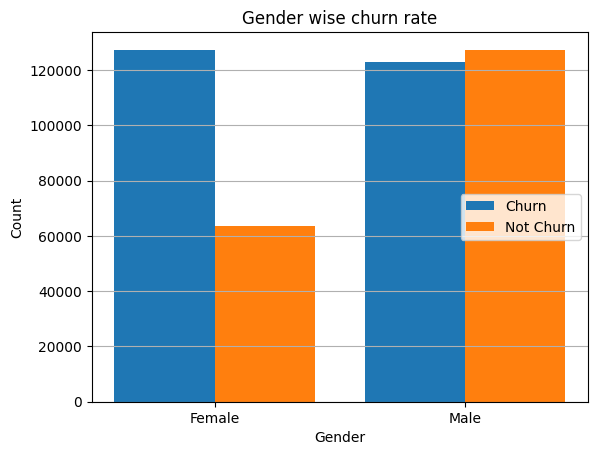

In [121]:
gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Có, giới tính và tỷ lệ rời bỏ có mối quan hệ với nhau.

Khách hàng nữ có tỷ lệ rời bỏ cao hơn một chút so với khách hàng nam. Lượng khách hàng nam năng động (không rời bỏ) gần gấp đôi lượng khách hàng nữ

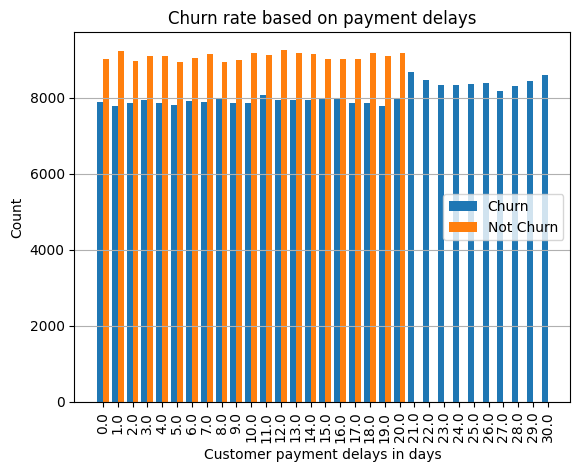

In [122]:
filtered = df.groupby(['Payment Delay', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

Khách hàng càng chậm thanh toán thì càng có nhiều khả năng họ sẽ bỏ dịch vụ.

Khách hàng không bị hủy có xu hướng có số ngày chậm thanh toán cao hơn so với những khách hàng bị hủy cho đến ngày thứ 20.

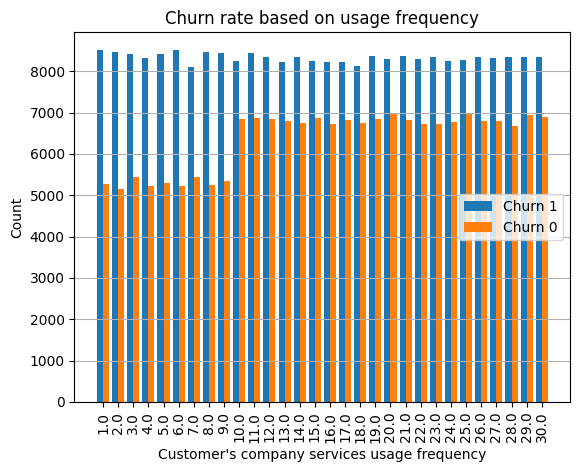

In [123]:
filtered = df.groupby(['Usage Frequency', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Khách hàng rời bỏ có xu hướng sử dụng dịch vụ của công ty nhiều hơn đáng kể so với những khách hàng không rời bỏ.

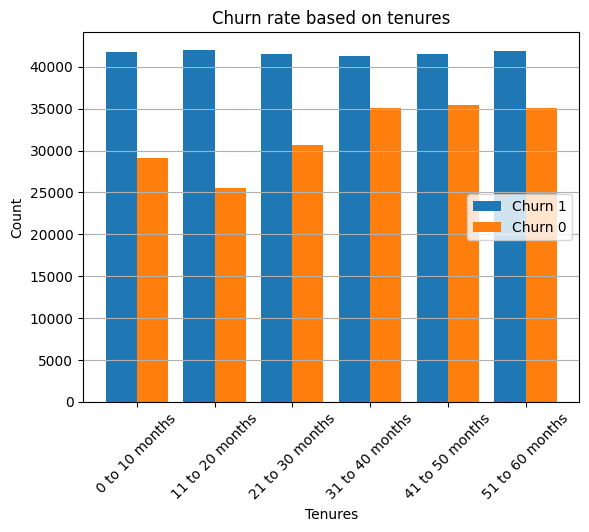

In [124]:
def categorize_age(Age):
    if 0 <= Age <= 10:
        return '0 to 10 months'
    elif 11 <= Age <= 20:
        return '11 to 20 months'
    elif 21 <= Age <= 30:
        return '21 to 30 months'
    elif 31 <= Age <= 40:
        return '31 to 40 months'
    elif 41 <= Age <= 50:
        return '41 to 50 months'
    elif 51 <= Age <= 60:
        return '51 to 60 months'
    else:
        pass # For nan values

filtered = df.copy()
filtered['Tenure_segmentation'] = df['Tenure'].apply(categorize_age)
filtered = filtered.groupby(['Tenure_segmentation', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Không, khách hàng có thời gian sử dụng lâu hơn sẽ có nhiều khả năng rời bỏ hơn

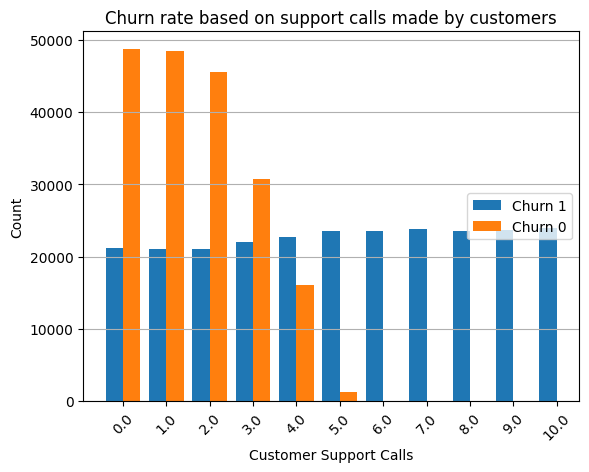

In [125]:
filtered = df.groupby(['Support Calls', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Có, khách hàng nhận được nhiều cuộc gọi hỗ trợ hơn có xu hướng rời bỏ nhiều hơn.

Ngược lại, những khách hàng không rời bỏ có xu hướng thực hiện nhiều cuộc gọi hỗ trợ khách hàng hơn từ 0 đến 3 cuộc gọi so với những khách hàng rời bỏ, sau đó những khách hàng rời bỏ sẽ thực hiện nhiều cuộc gọi hơn đáng kể.

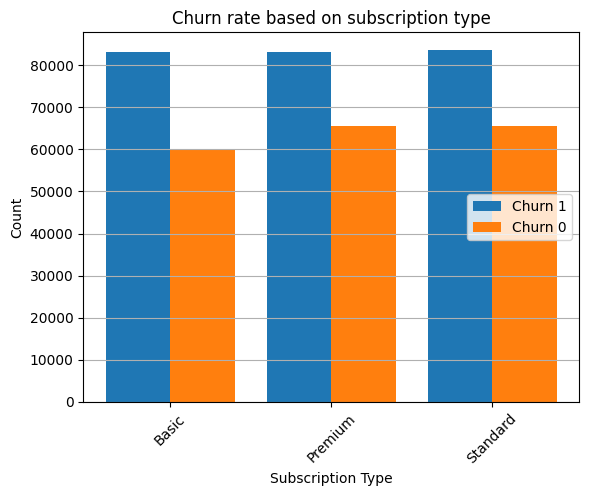

In [126]:
filtered = df.groupby(['Subscription Type', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Không, loại đăng ký không ảnh hưởng đến tỷ lệ khách hàng rời bỏ.

Những khách hàng không bị gián đoạn có xu hướng chọn loại đăng ký cao cấp hoặc tiêu chuẩn nhiều hơn một chút so với đăng ký cơ bản.

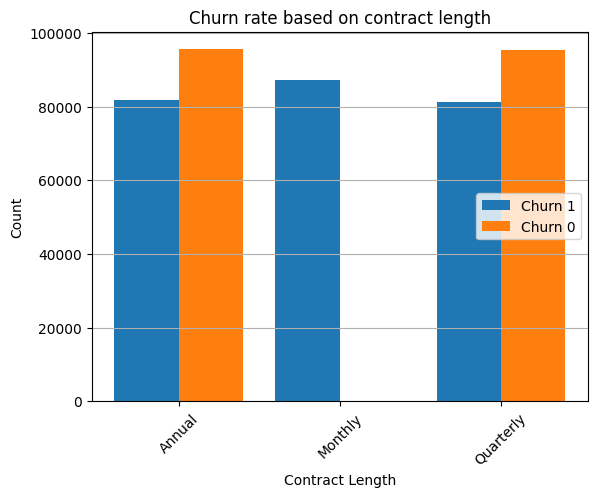

In [127]:
filtered = df.groupby(['Contract Length', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Khách hàng có thời hạn hợp đồng hàng quý có tỷ lệ rời bỏ thấp nhất, trong khi những khách hàng có thời hạn hợp đồng hàng tháng có tỷ lệ rời bỏ cao nhất. Ngược lại, những khách hàng không rời bỏ dịch vụ thường thích hợp đồng hàng năm và hàng quý hơn hợp đồng hàng tháng.

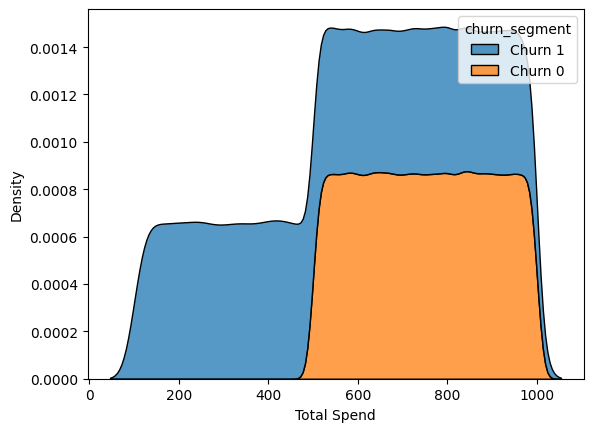

In [128]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn 1' if x == 1.0 else 'Churn 0' for x in df['Churn']]

sns.kdeplot(data=filtered, x="Total Spend", hue="churn_segment", multiple="stack")
plt.show()

=> Những khách hàng rời bỏ có xu hướng chi nhiều tiền hơn đáng kể so với những khách hàng không rời bỏ.

Cả khách hàng rời bỏ và khách hàng không rời bỏ đều có chung hành vi phân bổ tổng chi tiêu/tổng ​​chi tiêu.

# **4 | Data Processing**

# **4.1 | Transform Data**

In [129]:
# Chuyển đổi dữ liệu chuỗi sang dạng số
df.replace({'Gender': {'Male': 1, 'Female': 2},
            'Subscription Type': {'Basic': 1, 'Standard': 2, 'Premium': 3},
              'Contract Length': {'Monthly': 1, 'Quarterly': 2, 'Annual': 3}}, inplace=True)

In [130]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,2,39.0,14.0,5.0,18.0,2,3,932.0,17.0,1.0
1,3.0,65.0,2,49.0,1.0,10.0,8.0,1,1,557.0,6.0,1.0
2,4.0,55.0,2,14.0,4.0,6.0,18.0,1,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,1,1,617.0,20.0,1.0


# **4.2 | Correlation**

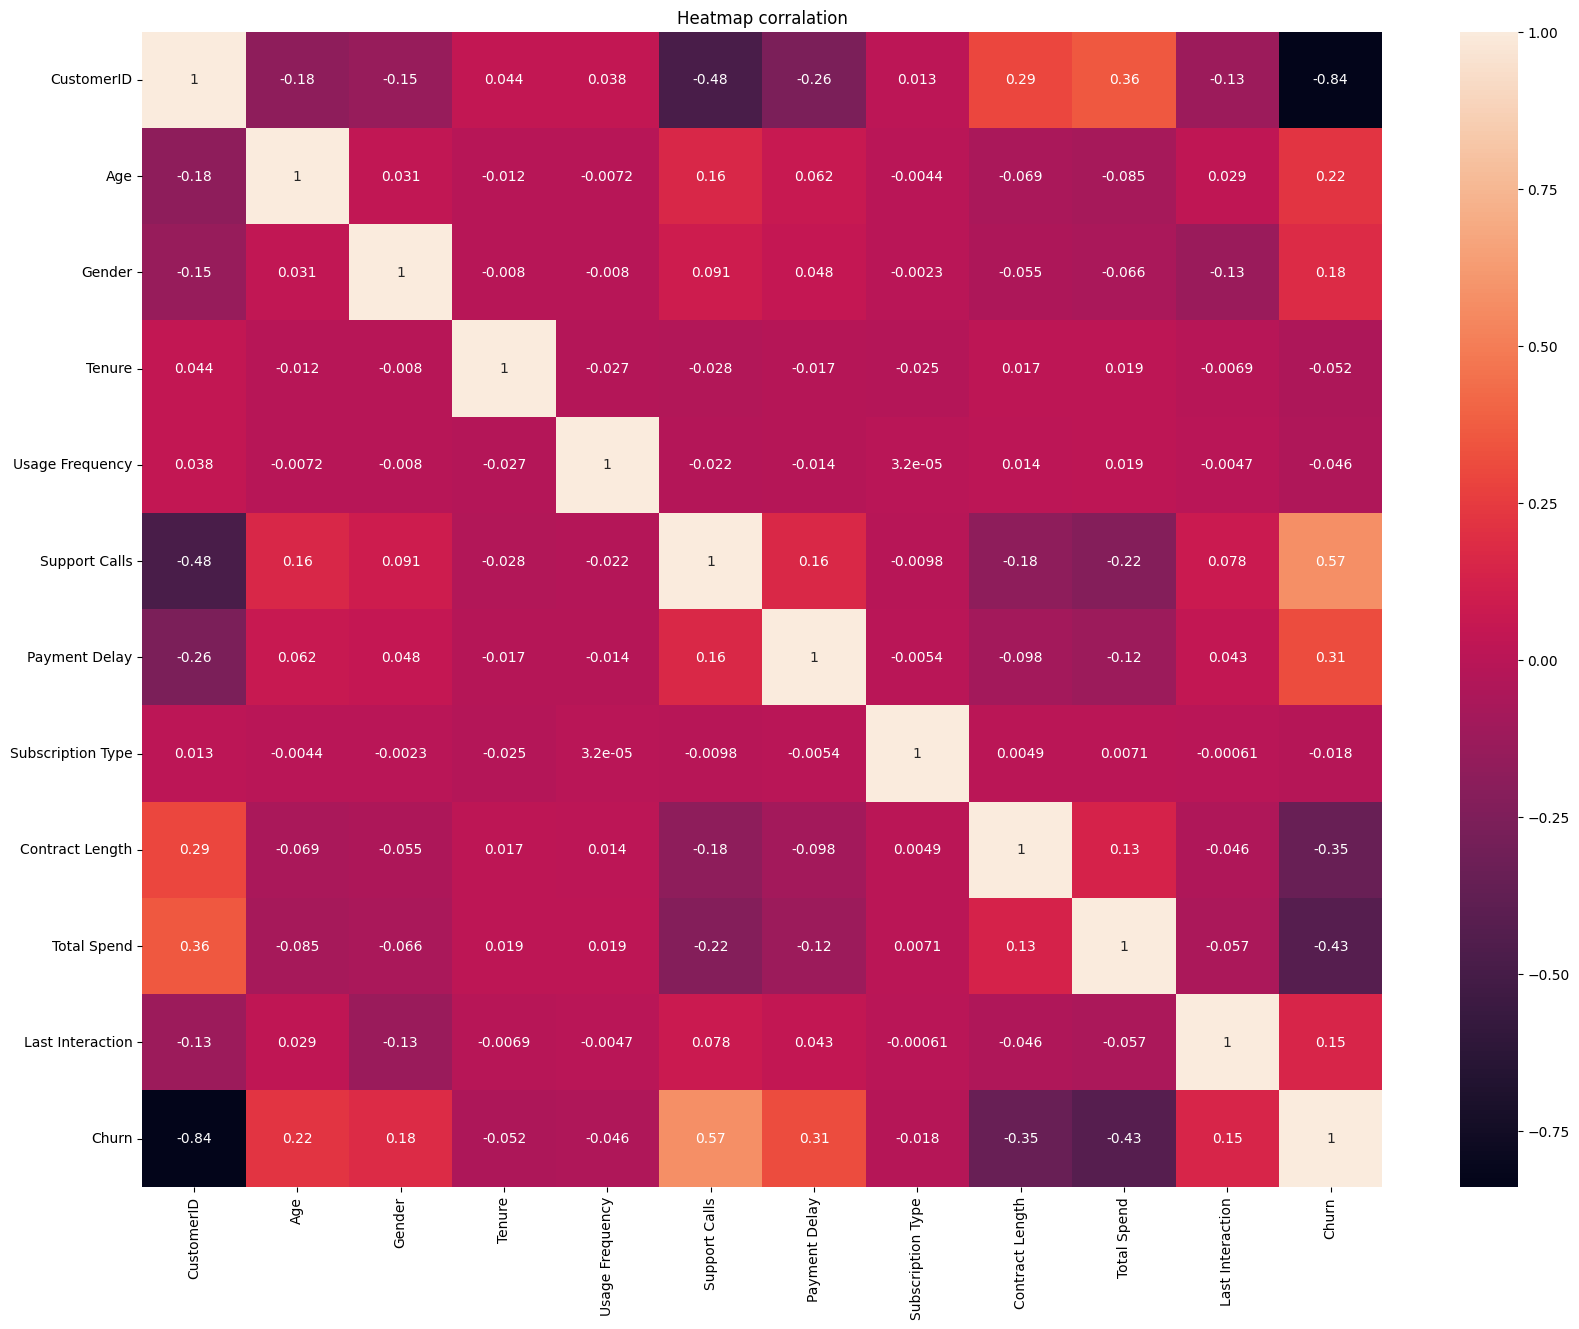

In [131]:
plt.figure(figsize=(20,15))
plt.title('Heatmap corralation')
sns.heatmap(data=pd.get_dummies(df).corr(), annot=True);

Đối với heat map tương quan, ô nào gần bằng 0 thì khả năng thuộc tính tương ứng với ô đó không ảnh hưởng nhiều đến kết quả.

ví dụ từ hàng Churn, giá trị -0.84 (Customer ID) là gần bằng 0 nhất => thuộc tính này không tương quan gì đến kết quả

tương quan thuận là những ô có giá trị lớn hơn 0, vd như cuộc gọi hỗ trợ càng cao thì tỷ lệ ở lại của khách hàng càng lớn

tương quan nghịch là những ô có giá trị âm, vd như tổng chi tiêu càng ít thì khả năng rời đi của khách hàng càng nhiều

áp dụng để giải thích trong bài toán phân loại khách hàng

In [132]:
# df = df.drop('Subscription Type', axis=1)

# **4.3 | Split Data**

In [133]:
X = df.drop(['CustomerID','Churn'], axis=1)
y = df['Churn']

In [134]:
#Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **5 | Decision Tree**

In [136]:
# Tạo mô hình Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9231685324441118
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38063
         1.0       0.99      0.87      0.93     50104

    accuracy                           0.92     88167
   macro avg       0.92      0.93      0.92     88167
weighted avg       0.93      0.92      0.92     88167



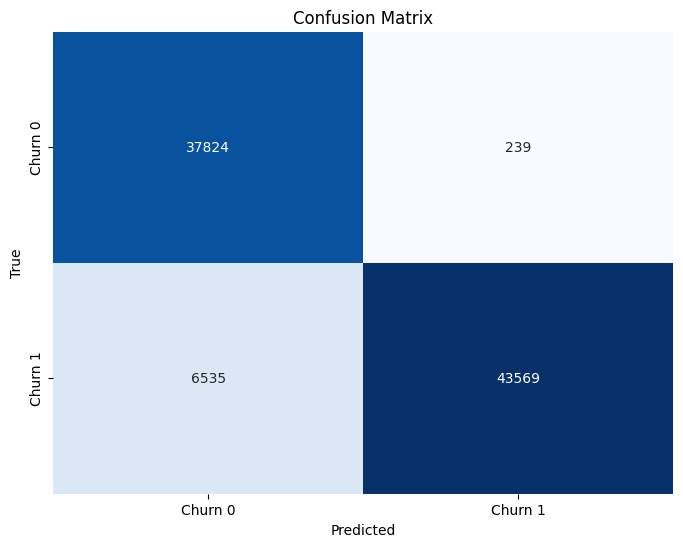

In [137]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận dự đoán bằng cách sử dụng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Churn 0', 'Churn 1'], yticklabels=['Churn 0', 'Churn 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

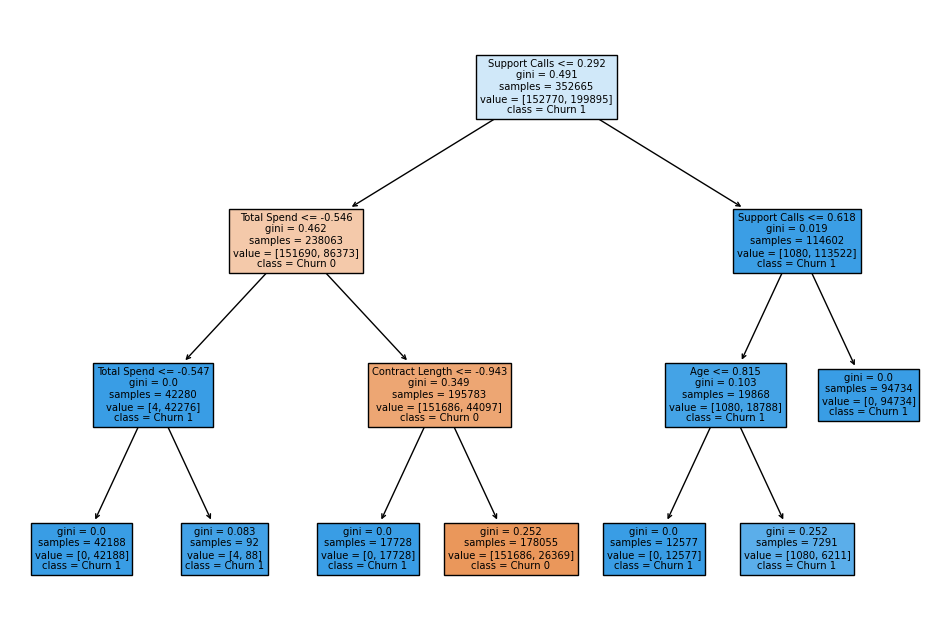

In [138]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Churn 0', 'Churn 1'], filled=True)
plt.show()

In [139]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.9231685324441118
Max Depth = 4: Test Score = 0.9567638685676046
Max Depth = 5: Test Score = 0.9775085916499371
Max Depth = 6: Test Score = 0.9777127496682432
Max Depth = 7: Test Score = 0.9839282271144533
Max Depth = 8: Test Score = 0.9935576803112276
Max Depth = 9: Test Score = 0.9960075765309016
Max Depth = 10: Test Score = 0.9969489718375356
Max Depth = 11: Test Score = 0.9982306305080132
Max Depth = 12: Test Score = 0.9992060521510315
Max Depth = 13: Test Score = 0.9996483945240283
Max Depth = 14: Test Score = 0.999909263102975
Max Depth = 15: Test Score = 0.9999319473272312
Max Depth = 16: Test Score = 0.9999319473272312
Max Depth = 17: Test Score = 0.9999319473272312
Max Depth = 18: Test Score = 0.9999319473272312
Max Depth = 19: Test Score = 0.9999319473272312
Best Max Depth = 15: Best Test Score = 0.9999319473272312


In [140]:
# Tạo mô hình Decision Tree
model = DecisionTreeClassifier(max_depth=15,random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999319473272312
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



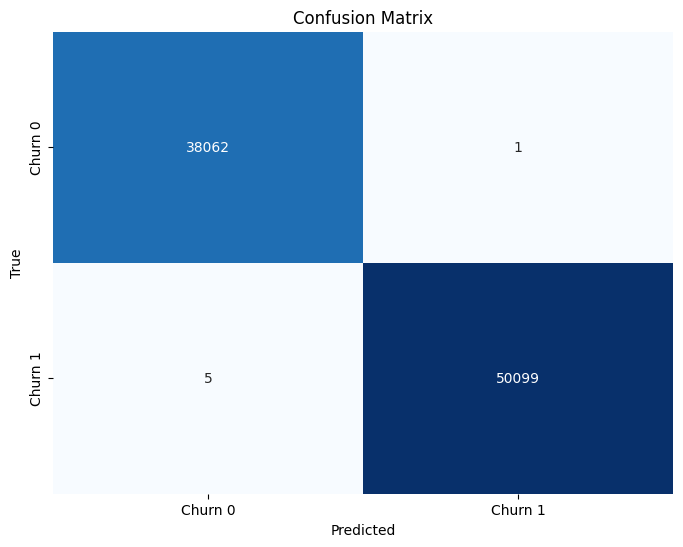

In [141]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận dự đoán bằng cách sử dụng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Churn 0', 'Churn 1'], yticklabels=['Churn 0', 'Churn 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [142]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- Support Calls <= 0.29
|   |--- Total Spend <= -0.55
|   |   |--- Total Spend <= -0.55
|   |   |   |--- class: 1.0
|   |   |--- Total Spend >  -0.55
|   |   |   |--- Payment Delay <= -1.15
|   |   |   |   |--- Age <= -0.23
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Age >  -0.23
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Payment Delay >  -1.15
|   |   |   |   |--- Usage Frequency <= -1.55
|   |   |   |   |   |--- Last Interaction <= -0.23
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Last Interaction >  -0.23
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Usage Frequency >  -1.55
|   |   |   |   |   |--- Support Calls <= -0.03
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Support Calls >  -0.03
|   |   |   |   |   |   |--- Contract Length <= 0.40
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Contract Length >  0.40
|   |   |   |   |   |   |   |--- Usage Frequency <= -0.33
|   |   |

# **6 | Naive Bayes**

In [143]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [144]:
# Dự đoán trên tập kiểm tra
y_pred_nb = nb.predict(X_test)

print("Precision Score:",precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1 Score:",f1_score(y_test, y_pred_nb, average='weighted'))
print("Navy Bayes Accuracy:",accuracy_score(y_test, y_pred_nb))

Precision Score: 0.9365739529443892
Recall Score: 0.9349416448331008
F1 Score: 0.9351300904817049
Navy Bayes Accuracy: 0.9349416448331008


In [145]:
classification_rep_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Navie Bayes):\n", classification_rep_nb)

Classification Report (Navie Bayes):
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     38063
         1.0       0.96      0.92      0.94     50104

    accuracy                           0.93     88167
   macro avg       0.93      0.94      0.93     88167
weighted avg       0.94      0.93      0.94     88167



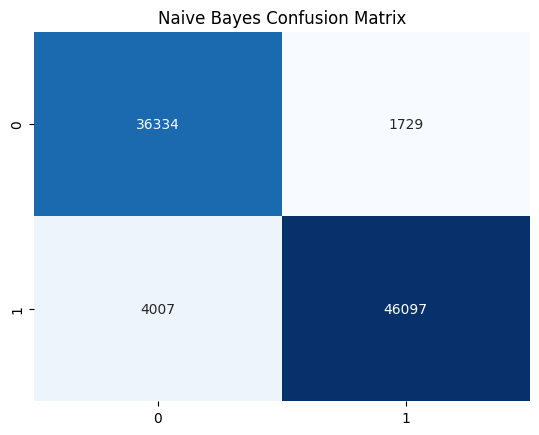

In [146]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
# Vẽ heatmap của ma trận nhầm lẫn (Navie Bayes)
sns.heatmap(cm_nb,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');
plt.show()

# **7 | Random Forest**

In [147]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo mô hình Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [148]:
# Dự đoán trên tập kiểm tra
y_pred_rf = rf_classifier.predict(X_test)

# In kết quả
print("Precision Score:",precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:",f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))

Precision Score: 0.9999319488054452
Recall Score: 0.9999319473272312
F1 Score: 0.999931947542028
Random Forest Accuracy: 0.9999319473272312


In [149]:
 classification_rep_rf = classification_report(y_test, y_pred_rf)
 print("Classification Report (Random Forest):\n", classification_rep_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



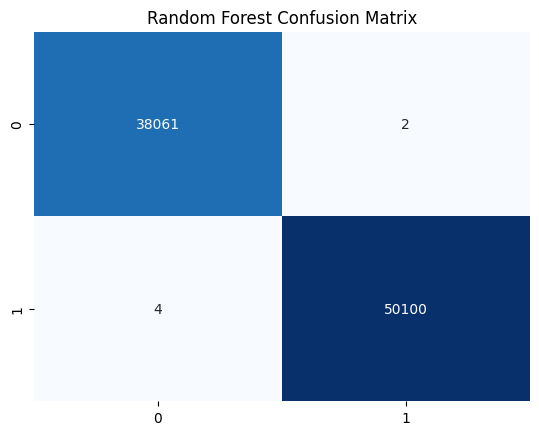

In [150]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Vẽ heatmap của ma trận nhầm lẫn (Random Forest)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

# **8 | Comparing Models**

Decision Tree Accuracy: 0.9999319473272312
Naive Bayes Accuracy: 0.9349416448331008
Random Forest Accuracy: 0.9999319473272312

Confusion Matrix (Decision Tree):
 [[38062     1]
 [    5 50099]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167


Confusion Matrix (Naive Bayes):
 [[36334  1729]
 [ 4007 46097]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     38063
         1.0       0.96      0.92      0.94     50104

    accuracy                           0.93     88167
   macro avg       0.93      0.94      0.93     88167
weighted avg       0.94      0.93      0.94     88167


Confus

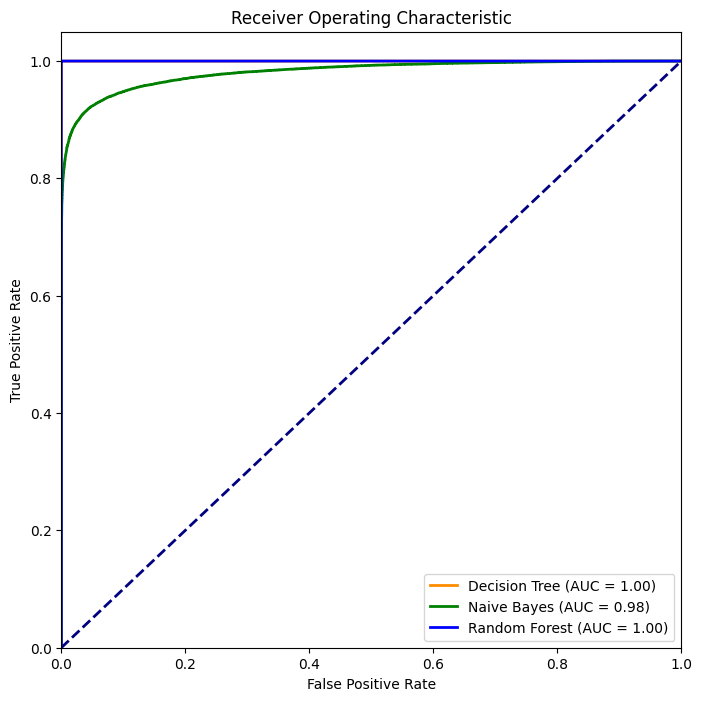

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Huấn luyện mô hình Decision Tree
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

# Huấn luyện mô hình Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Huấn luyện mô hình Random Forest
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Đánh giá hiệu suất của từng mô hình
dt_acc = accuracy_score(y_test, y_pred_dt)
nb_acc = accuracy_score(y_test, y_pred_nb)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Decision Tree Accuracy:", dt_acc)
print("Naive Bayes Accuracy:", nb_acc)
print("Random Forest Accuracy:", rf_acc)

# In ma trận nhầm lẫn và báo cáo phân loại
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Vẽ ROC curve (chỉ áp dụng cho bài toán phân loại nhị phân)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [152]:
pip install --upgrade matplotlib


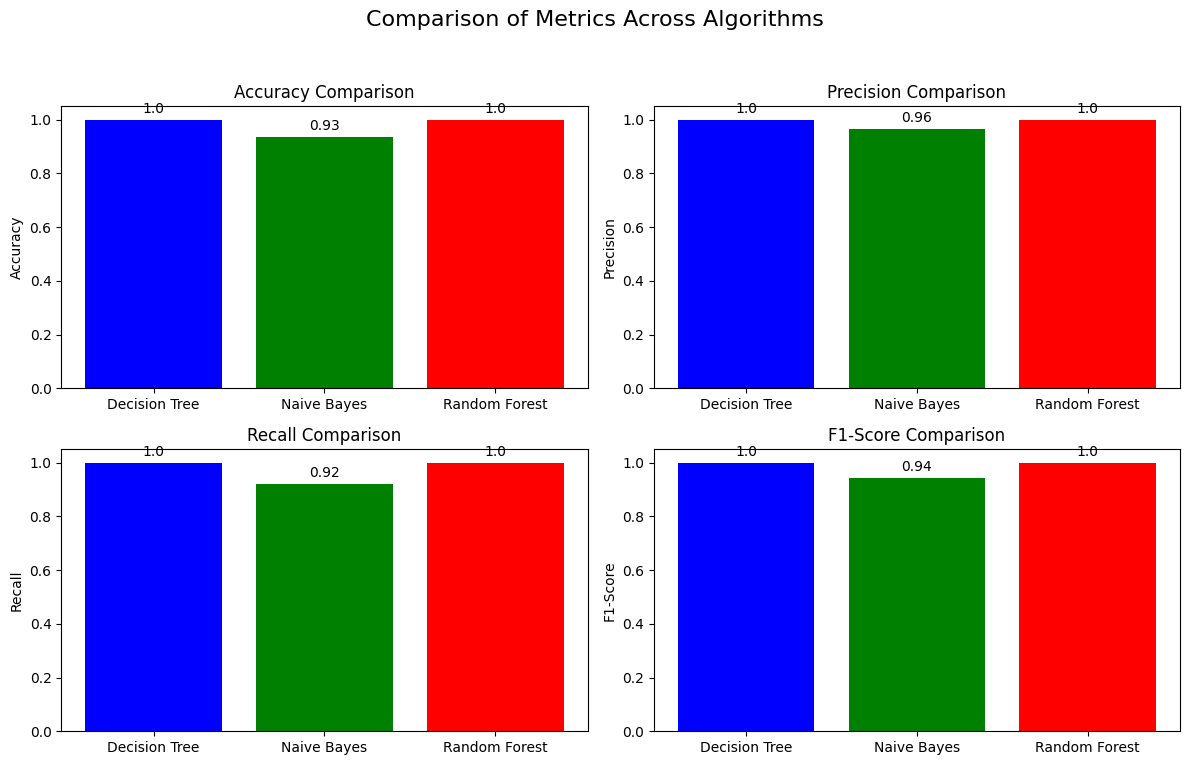

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Dự đoán trên tập kiểm tra
y_pred = model.fit(X_train, y_train).predict(X_test)
y_pred_nb = nb.fit(X_train, y_train).predict(X_test)
y_pred_rf = rf_classifier.fit(X_train, y_train).predict(X_test)

# Dữ liệu
algorithms = ['Decision Tree', 'Naive Bayes', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred),
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_rf)]

precision_scores = [precision_score(y_test, y_pred),
                    precision_score(y_test, y_pred_nb),
                    precision_score(y_test, y_pred_rf)]

recall_scores = [recall_score(y_test, y_pred),
                 recall_score(y_test, y_pred_nb),
                 recall_score(y_test, y_pred_rf)]

f1_scores = [f1_score(y_test, y_pred),
              f1_score(y_test, y_pred_nb),
              f1_score(y_test, y_pred_rf)]

# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Comparison of Metrics Across Algorithms', fontsize=16)

# Accuracy
rects1 = axes[0, 0].bar(algorithms, accuracy_scores, color=['blue', 'green', 'red'])
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison')

# Precision
rects2 = axes[0, 1].bar(algorithms, precision_scores, color=['blue', 'green', 'red'])
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision Comparison')

# Recall
rects3 = axes[1, 0].bar(algorithms, recall_scores, color=['blue', 'green', 'red'])
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall Comparison')

# F1-Score
rects4 = axes[1, 1].bar(algorithms, f1_scores, color=['blue', 'green', 'red'])
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_title('F1-Score Comparison')

# Thêm chú giải trên mỗi thanh
def autolabel(rects, scores, axes):
    for rect, score in zip(rects, scores):
        height = rect.get_height()
        axes.annotate('{}'.format(round(score, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, accuracy_scores, axes[0, 0])
autolabel(rects2, precision_scores, axes[0, 1])
autolabel(rects3, recall_scores, axes[1, 0])
autolabel(rects4, f1_scores, axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Compare real data**

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the data
data = pd.read_excel("/content/sample_data/Book2.xlsx")
# Print column names
print(data.columns)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [167]:
data.head(20)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,260797,64,2,19,28,6,21,3,1,810.08,20,1
1,260798,28,1,50,15,2,13,3,1,427.31,5,1
2,260799,40,2,38,2,2,15,2,3,367.96,16,1
3,260800,50,1,13,23,9,6,1,2,190.68,25,1
4,260801,22,1,10,17,5,14,2,1,494.73,27,1
5,260802,22,2,31,26,0,30,2,2,924.84,21,1
6,260803,61,1,38,19,4,5,2,2,303.69,27,1
7,260804,24,1,54,21,7,8,3,1,102.56,2,1
8,260805,56,1,42,30,9,7,3,3,337.81,20,1
9,260806,29,2,46,9,8,19,1,1,248.28,21,1


In [172]:
data = data.drop(['CustomerID','Churn'], axis=1)
y_pred_2 = model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [173]:
print(y_pred_2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 1. Decision Tree

Điểm mạnh:
*   Có độ chính xác ổn định
*   Dễ hiểu và dễ diễn giải cho người mới.
*   Không yêu cầu nhiều tiền xử lý dữ liệu.

Điểm yếu:
*   Trên dữ liệu hình ảnh phức tạp có thể bị overfitting trên dữ liệu phức tạp.


---


## 2. Naive Bayes
**Điểm mạnh:**
- Đơn giản và dễ triển khai.

**Điểm yếu:**
- Hoạt động kém khi giả định độc lập không được đáp ứng.
---
## 3. Random Forest
**Điểm mạnh:**
- Độ chính xác cao hơn so với Decision Tree và Naive Bayes
- Hiệu suất tốt trên dữ liệu có số lượng chiều lớn

**Điểm yếu:**
- Yêu cầu độ phức tạp và thời gian huấn luyện cao hơn so với Naive Bayes và Decision Tree.
- Có thể không hiệu quả trên dữ liệu có nhiễu hoặc không đồng nhất.



